# IMPORT

In [212]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib.font_manager as fm
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf
import random
try:
    from pmdarima.arima import auto_arima
except:
    !pip install pmdarima
    from pmdarima.arima import auto_arima
from sklearn.linear_model import LinearRegression   
font = fm.FontProperties(fname='../input/nanum34/NanumSquareR.ttf')
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', lambda x: '%.8f' % x)
%matplotlib inline

# 유동인구 데이터 로드

In [213]:
time_df_list = []
age_df_list = []
for x in [201902,201903,201904,201905,202002,202003,202004,202005]:
    time_df_list.append('../input/bigcontest-data/data/01_유동인구데이터(SK텔레콤)/4_FLOW_TIME_'+str(x)+'.CSV')
    age_df_list.append('../input/bigcontest-data/data/01_유동인구데이터(SK텔레콤)/4_FLOW_AGE_'+str(x)+'.CSV')
time_df = pd.concat([pd.read_csv(path,sep='|') for path in time_df_list])
age_df = pd.concat([pd.read_csv(path,sep='|') for path in age_df_list])     

In [214]:
time_df.head()

,STD_YM,STD_YMD,HDONG_CD,HDONG_NM,TMST_00,TMST_01,TMST_02,TMST_03,TMST_04,TMST_05,...,TMST_14,TMST_15,TMST_16,TMST_17,TMST_18,TMST_19,TMST_20,TMST_21,TMST_22,TMST_23
0,201902,20190201,1114052000,소공동,1496.35000000,1022.83000000,706.51000000,547.77000000,1673.02000000,3561.05000000,...,12355.91000000,13096.69000000,9317.64000000,15029.74000000,14135.83000000,9074.02000000,6032.26000000,6047.05000000,4806.65000000,2956.11000000
1,201902,20190201,1114054000,회현동,1692.37000000,1117.26000000,839.57000000,653.41000000,1920.52000000,4687.95000000,...,18210.30000000,20292.65000000,12527.29000000,21454.63000000,18214.50000000,11914.26000000,9800.64000000,9341.24000000,6884.91000000,4034.56000000
2,201902,20190201,1114055000,명동,2226.91000000,1726.10000000,1145.43000000,894.97000000,2513.32000000,5268.51000000,...,20332.71000000,21458.64000000,14434.56000000,25855.14000000,23107.23000000,13460.05000000,9797.40000000,8719.30000000,7203.45000000,4845.48000000
3,201902,20190201,1114057000,필동,698.73000000,440.70000000,385.99000000,275.64000000,497.41000000,1990.42000000,...,6900.66000000,9789.54000000,6205.74000000,13277.25000000,12101.51000000,5698.58000000,4464.46000000,4088.53000000,3385.14000000,1746.28000000
4,201902,20190201,1114058000,장충동,768.34000000,447.23000000,429.90000000,349.46000000,507.74000000,1310.67000000,...,5187.02000000,5211.60000000,3656.54000000,6841.98000000,5810.71000000,4463.99000000,2807.25000000,2626.12000000,2415.41000000,1398.94000000


In [215]:
age_df.head()

,STD_YM,STD_YMD,HDONG_CD,HDONG_NM,MAN_FLOW_POP_CNT_0004,MAN_FLOW_POP_CNT_0509,MAN_FLOW_POP_CNT_1014,MAN_FLOW_POP_CNT_1519,MAN_FLOW_POP_CNT_2024,MAN_FLOW_POP_CNT_2529,...,WMAN_FLOW_POP_CNT_2529,WMAN_FLOW_POP_CNT_3034,WMAN_FLOW_POP_CNT_3539,WMAN_FLOW_POP_CNT_4044,WMAN_FLOW_POP_CNT_4549,WMAN_FLOW_POP_CNT_5054,WMAN_FLOW_POP_CNT_5559,WMAN_FLOW_POP_CNT_6064,WMAN_FLOW_POP_CNT_6569,WMAN_FLOW_POP_CNT_70U
0,201902,20190201,1114052000,소공동,16.64000000,116.18000000,419.70000000,1553.57000000,5196.07000000,11195.62000000,...,13323.19000000,12741.15000000,11628.80000000,10006.80000000,9807.06000000,8099.38000000,7260.17000000,5757.53000000,3359.85000000,4431.71000000
1,201902,20190202,1114052000,소공동,3.14000000,141.07000000,763.30000000,1405.29000000,4235.82000000,7592.34000000,...,7898.27000000,6580.27000000,5714.75000000,4946.22000000,5055.32000000,4560.27000000,4364.57000000,3838.77000000,2453.97000000,3207.26000000
2,201902,20190203,1114052000,소공동,1.38000000,120.39000000,698.23000000,1117.17000000,3032.90000000,5173.35000000,...,5079.63000000,4454.43000000,3905.32000000,3484.47000000,3703.24000000,3270.26000000,2984.05000000,2484.98000000,1511.67000000,1954.98000000
3,201902,20190204,1114052000,소공동,0.08000000,141.61000000,772.41000000,1248.85000000,3001.95000000,4641.82000000,...,4317.63000000,3676.47000000,3506.37000000,3108.99000000,3324.07000000,2841.35000000,2644.42000000,2164.35000000,1230.21000000,1520.35000000
4,201902,20190205,1114052000,소공동,0.00000000,254.70000000,1394.92000000,2190.69000000,3420.15000000,5478.30000000,...,4813.86000000,4967.92000000,5161.96000000,4856.63000000,5212.69000000,4462.94000000,4183.38000000,3265.62000000,1692.74000000,2147.09000000


In [216]:
# index를 datetime 형식으로 변환한 STD_YMD 칼럼의 값으로 변경
time_df.index=pd.to_datetime(time_df['STD_YMD'],format='%Y%m%d')
age_df.index=pd.to_datetime(time_df['STD_YMD'],format='%Y%m%d')

In [217]:
# 결측값 조사
print('시간별 유동인구 데이터프레임 null 개수:',time_df.isna().sum().sum())
print('연령대별 유동인구 데이터프레임 null 개수:',time_df.isna().sum().sum())

시간별 유동인구 데이터프레임 null 개수: 0
연령대별 유동인구 데이터프레임 null 개수: 0


In [218]:
print('2019년에 존재하고 2020년에 존재하지 않는 STD_YMD: ',*set(time_df['2019'].STD_YMD.astype(str).str[4:])-set(time_df['2020'].STD_YMD.astype(str).str[4:])) 
print('2020년에 존재하고 2019년에 존재하지 않는 STD_YMD: ',*set(time_df['2020'].STD_YMD.astype(str).str[4:])-set(time_df['2019'].STD_YMD.astype(str).str[4:]))

2019년에 존재하고 2020년에 존재하지 않는 STD_YMD: 
2020년에 존재하고 2019년에 존재하지 않는 STD_YMD:  0229


In [219]:
# 2019년 2020년 일 평균 유동인구 추세 시각화

mean_flow_2019=time_df['2019'].loc[:,'TMST_00':'TMST_23'].groupby(time_df['2019'].index).mean().sum(axis=1)
mean_flow_2020=time_df['2020'].loc[:,'TMST_00':'TMST_23'].groupby(time_df['2020'].index).mean().sum(axis=1)

In [220]:
# 2020년 윤년 2월 29일 데이터 제거
mean_flow_2020_not_leap=mean_flow_2020[mean_flow_2020.index != '2020-02-29']

In [221]:
corona=pd.read_csv('../input/coronavirusdataset/Time.csv') # 일별 코로나 확진자 관련 데이터 로드
corona=corona.drop(['test','negative','time','released','deceased'],axis=1) # 일별 누적 확진자 수, date 칼럼 제외하고 삭제
corona['date']=pd.to_datetime(corona['date'],format='%Y-%m-%d') # datetime 변수로 date 칼럼 변경
corona=corona.set_index('date').diff().fillna(1.0).astype(int) # date 칼럼을 index로 설정

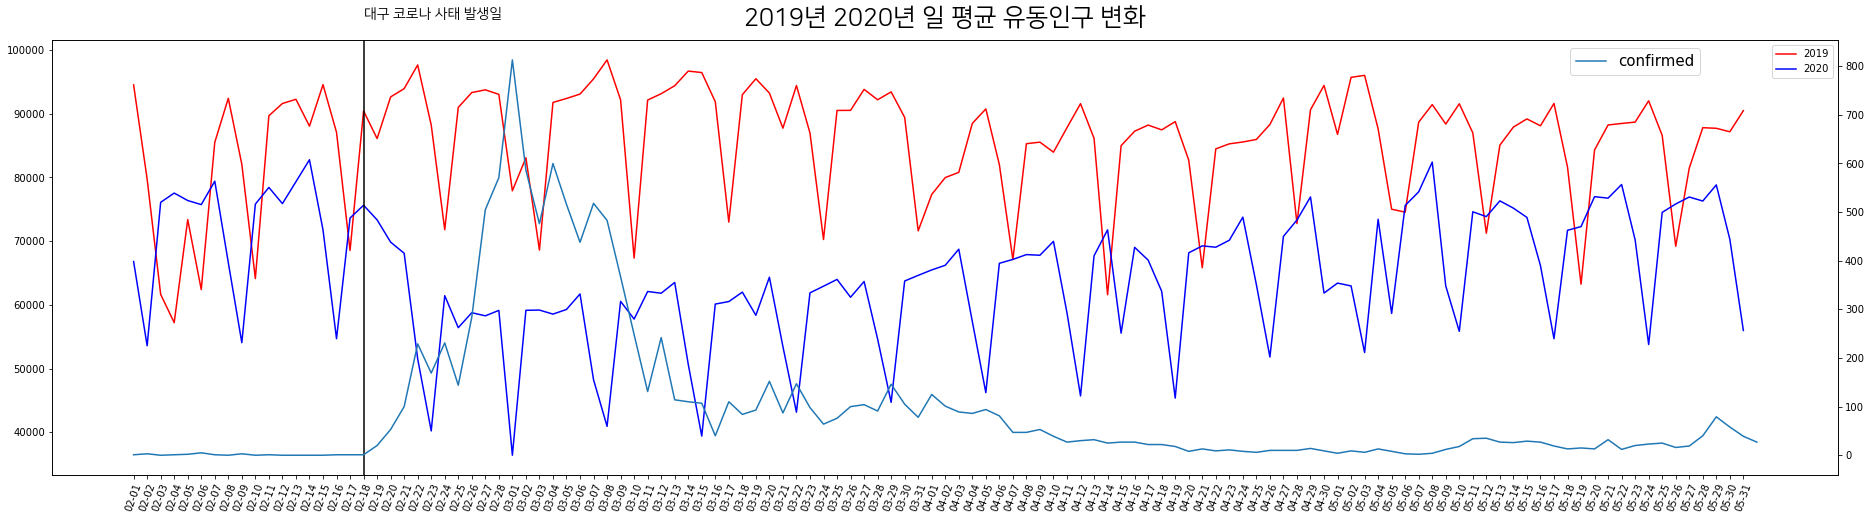

In [222]:
fig,ax=plt.subplots(figsize=(32,8))
sns.lineplot(data=mean_flow_2019.reset_index(drop=True),c='r',ax=ax,label='2019')
sns.lineplot(data=mean_flow_2020_not_leap.reset_index(drop=True),c='b',ax=ax,label='2020')
ax2=ax.twinx()
sns.lineplot(data=corona[(corona.index>='2020-02')&(corona.index<'2020-06')].reset_index(drop=True),c='k',ax=ax2)
ax.axvline(17,c='k')
plt.text(17,900,'대구 코로나 사태 발생일',fontproperties=font,size=14,c='k')
# ax.set_xticklabels(np.arange(min(mean_flow_2020.index),max(mean_flow_2020.index),7))
plt.xticks(np.arange(0, 120, 1.0))
plt.title('2019년 2020년 일 평균 유동인구 변화',fontproperties=font,size=25,pad=15)
ax.set_xticklabels(labels=mean_flow_2020_not_leap.index.astype(str).str[5:],rotation=70)
ax2.legend(loc=[0.85,0.92],fontsize=15)
plt.show()

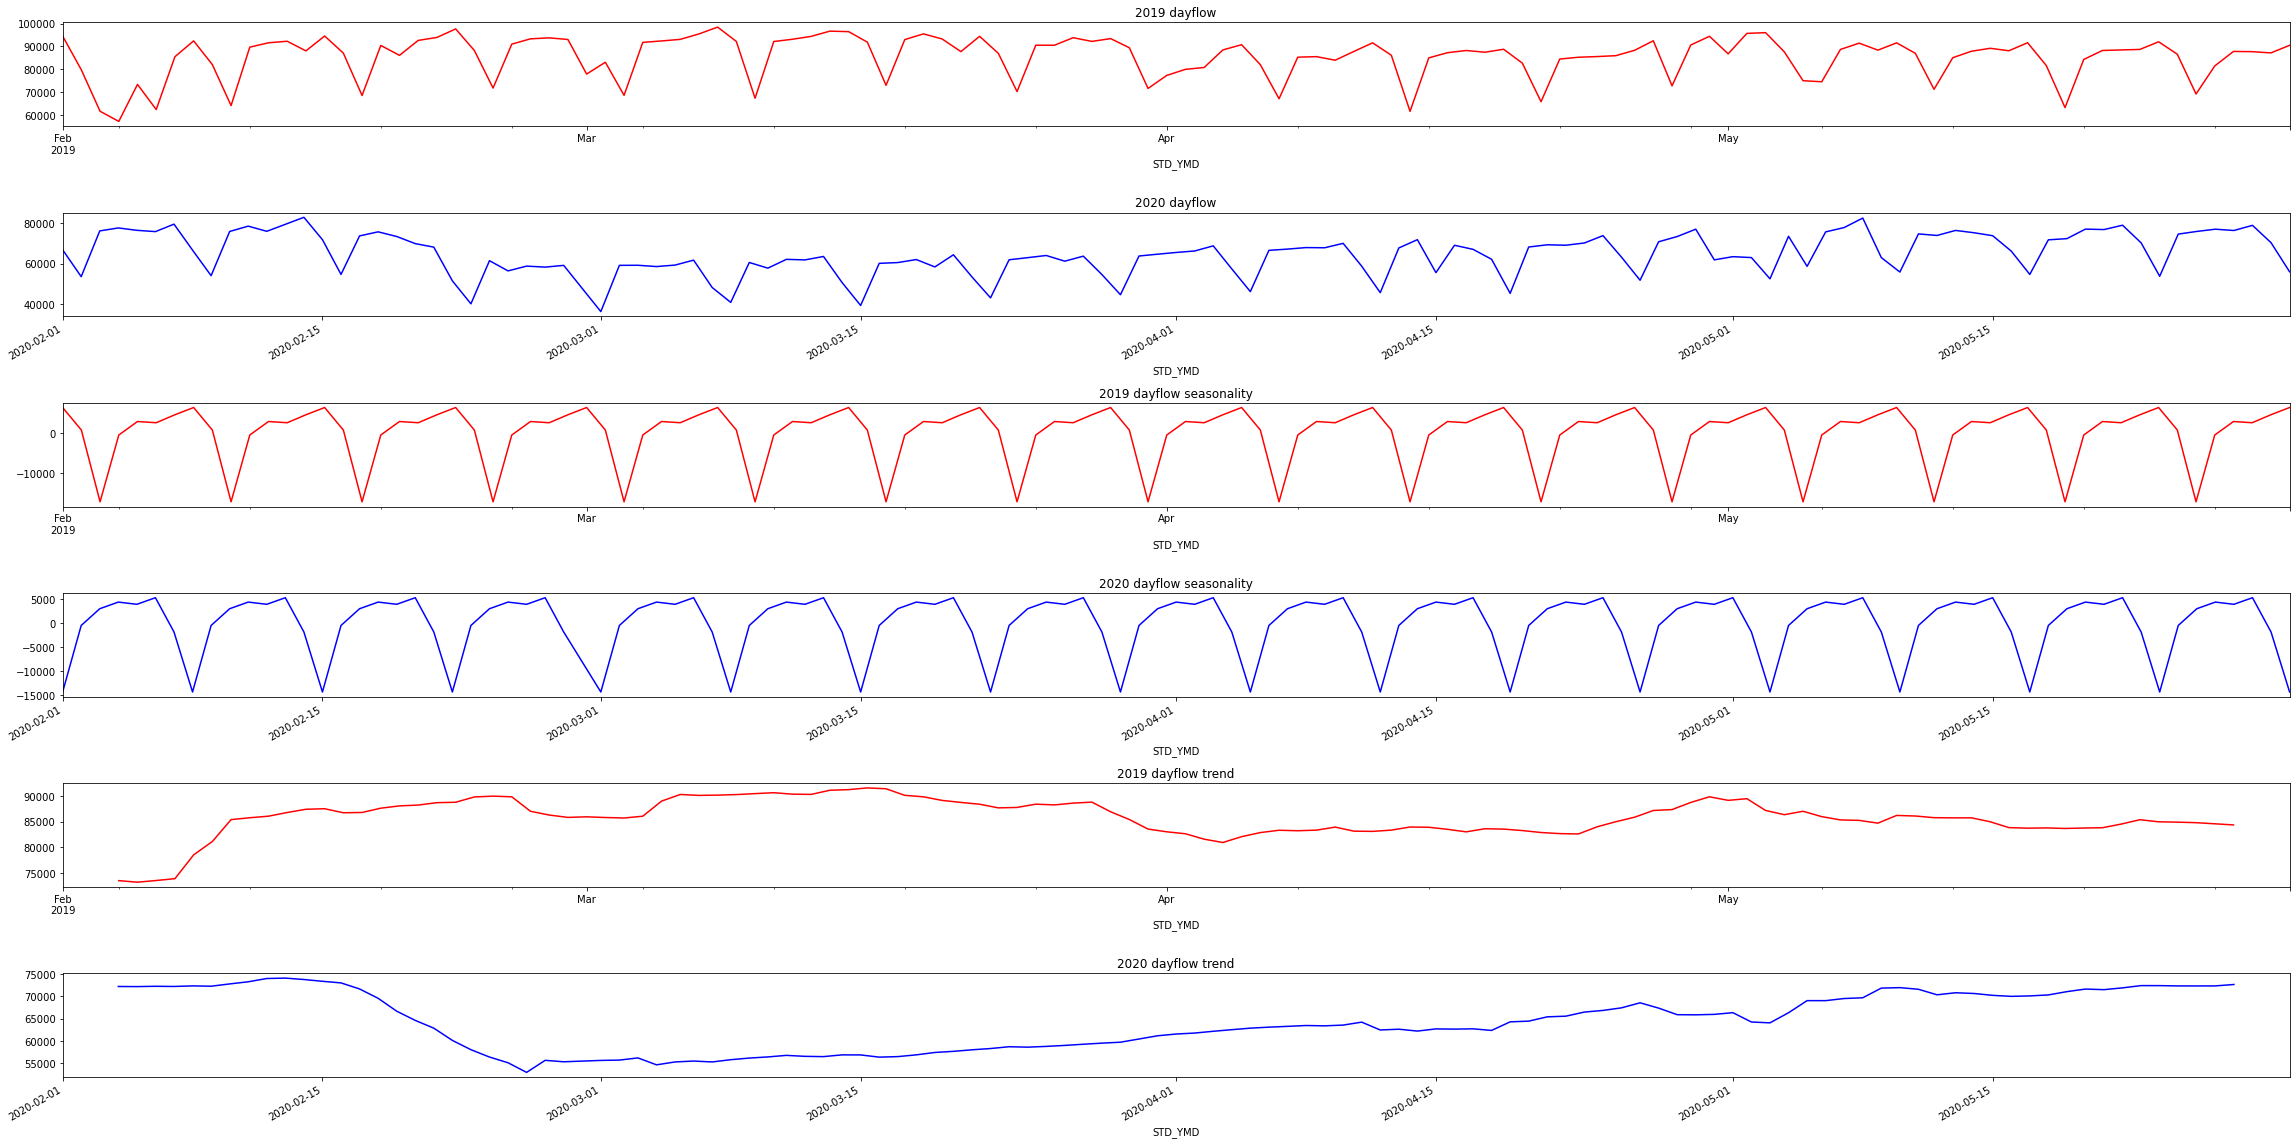

In [223]:
df_2019=mean_flow_2019
df_2020=mean_flow_2020_not_leap
fig,ax=plt.subplots(6,1,figsize=(32,16))
decom = sm.tsa.seasonal_decompose(df_2019,freq=7)
decom_2 = sm.tsa.seasonal_decompose(df_2020,freq=7)
decom.observed.plot(ax=ax[0],title='2019 dayflow',c='red')
decom.seasonal.plot(ax=ax[2],title='2019 dayflow seasonality',c='red')
decom.trend.plot(ax=ax[4],title='2019 dayflow trend',c='red')
decom_2.observed.plot(ax=ax[1],title='2020 dayflow',c='blue')
decom_2.seasonal.plot(ax=ax[3],title='2020 dayflow seasonality',c='blue')
decom_2.trend.plot(ax=ax[5],title='2020 dayflow trend',c='blue')
ax[1].set_xlim(['2020-02-01','2020-05-31'])
ax[3].set_xlim(['2020-02-01','2020-05-31'])
ax[5].set_xlim(['2020-02-01','2020-05-31'])
plt.tight_layout()
plt.show()

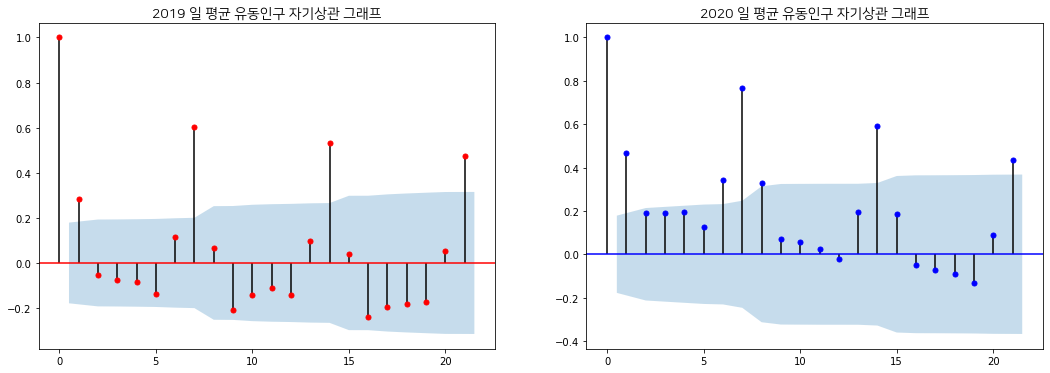

In [224]:
fig,ax=plt.subplots(1,2,figsize=(18,6))
plot=plot_acf(mean_flow_2019,ax=ax[0],c='r') 
plot=plot_acf(mean_flow_2020,ax=ax[1],c='b')
ax[0].set_title('2019 일 평균 유동인구 자기상관 그래프',fontproperties=font,size=14)
ax[1].set_title('2020 일 평균 유동인구 자기상관 그래프',fontproperties=font,size=14)
plt.show() # Autocorrelation graph를 통해 7일 주기 확인 (주 단위 분석 필요)

In [225]:
week_flow_2019 = mean_flow_2019.copy()
week_flow_2020 = mean_flow_2020.copy()

In [226]:
week_flow_2019.index=week_flow_2019.index.week
week_flow_2020.index=week_flow_2020.index.week

In [227]:
week_flow_2019=pd.DataFrame(week_flow_2019,columns=['유동인구'])
week_flow_2020=pd.DataFrame(week_flow_2020,columns=['유동인구'])
week_flow_2019.index.names = ['week']
week_flow_2020.index.names = ['week']

In [228]:
week_flow_2019=week_flow_2019.groupby(week_flow_2019.index).mean()[1:-1] # 2월 초 / 5월 말 7일 미만 주 삭제
week_flow_2020=week_flow_2020.groupby(week_flow_2020.index).mean()[1:-1] 

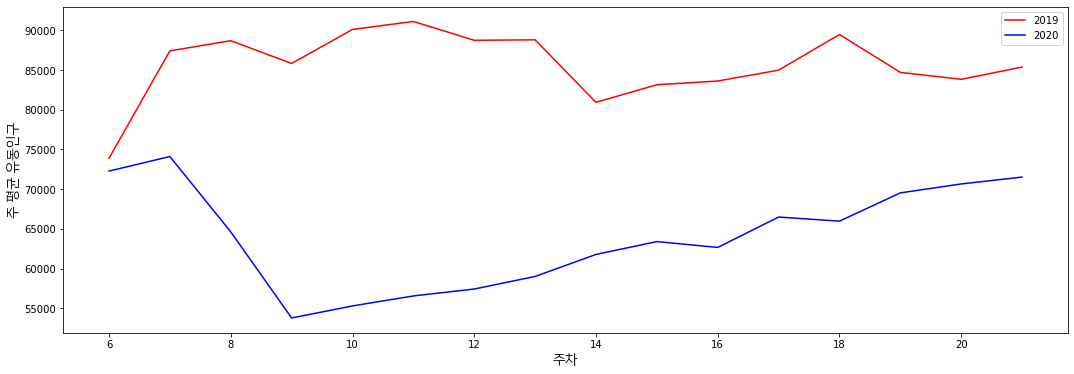

In [229]:
fig,ax=plt.subplots(figsize=(18,6))
week_flow_2019.plot(ax=ax,label='2019',c='r')
week_flow_2020.plot(ax=ax,label='2020',c='b')
plt.legend(['2019','2020'])
ax.set_ylabel('주 평균 유동인구',fontproperties=font,size=14)
ax.set_xlabel('주차',fontproperties=font,size=14)
plt.show()

In [230]:
week_flow_change=week_flow_2020-week_flow_2019 # 2020년 2019 동일 주 평균 유동인구 변화량 
week_flow_change.head()

,유동인구
week,
6,-1609.58364389
7,-13302.41981366
8,-24078.34527950
9,-32050.38496894
10,-34818.61766046


In [231]:
corona_2_5=corona[(corona.index>='2020-02')&(corona.index<'2020-06')] # 2020년 2월 ~5월 확진자 데이터 추출

In [234]:
corona_2_5.index = corona_2_5.index.week
corona_2_5.index.names = ['week']

In [235]:
corona_week_confirmed=corona_2_5.groupby(corona_2_5.index).sum()


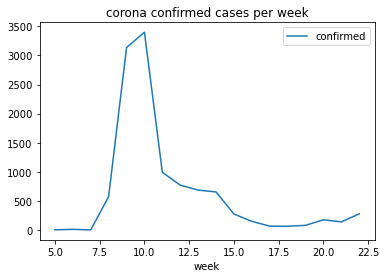

In [236]:
corona_week_confirmed.plot(title='corona confirmed cases per week')
plt.show()

In [237]:
week_flow_confirmed=pd.merge(week_flow_change,corona_week_confirmed,left_index=True,right_index=True)
week_flow_confirmed

,유동인구,confirmed
week,,
6,-1609.58364389,12
7,-13302.41981366,2
8,-24078.34527950,573
9,-32050.38496894,3134
10,-34818.61766046,3398
11,-34564.31583851,992
12,-31321.85703934,771
13,-29799.66356108,686
14,-19154.44184265,654


In [238]:
pd.merge(week_flow_change,corona_week_confirmed,left_index=True,right_index=True).corr() # -0.682545로 어느정도 유의한 상관관계를 가지고 있었다

,유동인구,confirmed
유동인구,1.00000000,-0.68254543
confirmed,-0.68254543,1.00000000


In [243]:
offline_sales=pd.read_excel('../input/bigcontest-data/data/04_유통데이터(GS리테일)/04__(GS)_   .xlsx',sheet_name='종합테이블(TB_DD_STR_PURCH_CLS)')

In [244]:
offline_sales.head()

,OPER_DT,PVN,BOR,ADMD,AMT_IND,LCLS_10_P,LCLS_20_P,LCLS_30_P,LCLS_40_P,LCLS_50_P,LCLS_60_P,LCLS_70_P,LCLS_80_P
0,20190201,대구광역시,수성구,고산1동,1.06433557,0.45084761,0.17222093,0.29545809,0.02326287,0.04467943,0.00507460,0.00481966,0.00363682
1,20190201,대구광역시,수성구,고산2동,1.07641799,0.45793662,0.19627353,0.29556381,0.00552103,0.03405573,0.00084376,0.00889254,0.00091298
2,20190201,대구광역시,수성구,고산3동,0.85607140,0.35997760,0.19660249,0.37676160,0.01340777,0.02960601,0.00911737,0.00883059,0.00569657
3,20190201,대구광역시,수성구,두산동,0.72486779,0.28196869,0.17520737,0.36320214,0.02423468,0.13419099,0.00000000,0.02119613,0.00000000
4,20190201,대구광역시,수성구,만촌1동,1.15572808,0.40098349,0.20045413,0.31053125,0.03886803,0.03542653,0.00528373,0.00573365,0.00271919


In [245]:
offline_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14460 entries, 0 to 14459
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   OPER_DT    14460 non-null  int64  
 1   PVN        14460 non-null  object 
 2   BOR        14460 non-null  object 
 3   ADMD       14460 non-null  object 
 4   AMT_IND    14460 non-null  float64
 5   LCLS_10_P  14460 non-null  float64
 6   LCLS_20_P  14460 non-null  float64
 7   LCLS_30_P  14460 non-null  float64
 8   LCLS_40_P  14460 non-null  float64
 9   LCLS_50_P  14460 non-null  float64
 10  LCLS_60_P  14460 non-null  float64
 11  LCLS_70_P  14460 non-null  float64
 12  LCLS_80_P  14460 non-null  float64
dtypes: float64(9), int64(1), object(3)
memory usage: 1.4+ MB


In [246]:
card_df=pd.read_csv('../input/bigcontest-data/data/02_카드매출데이터(신한카드)/CARD_SPENDING_RESIDENT/CARD_SPENDING_RESIDENT.txt',encoding='CP949',sep='\t')

In [247]:
offline_sales['year'] = offline_sales['OPER_DT'].astype(str).str[:4]
offline_sales['OPER_DT'] = pd.to_datetime(offline_sales['OPER_DT'],format="%Y%m%d")
offline_sales.head() # LCLS_10_P ~ LCLS_80_P 의 경우 비중을 나타내는 칼럼이므로 매출지수인 AMT_IND를 곱해 상품별 매출 지수를 나타내도록 한다.

,OPER_DT,PVN,BOR,ADMD,AMT_IND,LCLS_10_P,LCLS_20_P,LCLS_30_P,LCLS_40_P,LCLS_50_P,LCLS_60_P,LCLS_70_P,LCLS_80_P,year
0,2019-02-01,대구광역시,수성구,고산1동,1.06433557,0.45084761,0.17222093,0.29545809,0.02326287,0.04467943,0.00507460,0.00481966,0.00363682,2019
1,2019-02-01,대구광역시,수성구,고산2동,1.07641799,0.45793662,0.19627353,0.29556381,0.00552103,0.03405573,0.00084376,0.00889254,0.00091298,2019
2,2019-02-01,대구광역시,수성구,고산3동,0.85607140,0.35997760,0.19660249,0.37676160,0.01340777,0.02960601,0.00911737,0.00883059,0.00569657,2019
3,2019-02-01,대구광역시,수성구,두산동,0.72486779,0.28196869,0.17520737,0.36320214,0.02423468,0.13419099,0.00000000,0.02119613,0.00000000,2019
4,2019-02-01,대구광역시,수성구,만촌1동,1.15572808,0.40098349,0.20045413,0.31053125,0.03886803,0.03542653,0.00528373,0.00573365,0.00271919,2019


In [248]:
offline_sales.loc[:,'LCLS_10_P':'LCLS_80_P']=offline_sales.loc[:,'LCLS_10_P':'LCLS_80_P'].multiply(offline_sales['AMT_IND'],axis=0)
# LCLS_10_P ~ LCLS_80_P 의 경우 비중을 나타내는 칼럼이므로 매출지수인 AMT_IND를 곱해 상품별 매출 지수를 나타내도록 한다.
offline_sales.head()

,OPER_DT,PVN,BOR,ADMD,AMT_IND,LCLS_10_P,LCLS_20_P,LCLS_30_P,LCLS_40_P,LCLS_50_P,LCLS_60_P,LCLS_70_P,LCLS_80_P,year
0,2019-02-01,대구광역시,수성구,고산1동,1.06433557,0.47985315,0.18330086,0.31446655,0.02475950,0.04755390,0.00540108,0.00512974,0.00387079,2019
1,2019-02-01,대구광역시,수성구,고산2동,1.07641799,0.49293122,0.21127236,0.31815020,0.00594294,0.03665820,0.00090823,0.00957209,0.00098275,2019
2,2019-02-01,대구광역시,수성구,고산3동,0.85607140,0.30816652,0.16830577,0.32253483,0.01147801,0.02534486,0.00780512,0.00755961,0.00487667,2019
3,2019-02-01,대구광역시,수성구,두산동,0.72486779,0.20439002,0.12700218,0.26327353,0.01756694,0.09727073,0.00000000,0.01536439,0.00000000,2019
4,2019-02-01,대구광역시,수성구,만촌1동,1.15572808,0.46342788,0.23167047,0.35888968,0.04492088,0.04094344,0.00610655,0.00662655,0.00314264,2019


In [249]:
reshaped_sales_df=offline_sales.loc[:,'AMT_IND':].melt(id_vars=['year']).groupby(['variable','year']).mean().reset_index()
reshaped_sales_df

,variable,year,value
0,AMT_IND,2019,1.11598275
1,AMT_IND,2020,0.94319877
2,LCLS_10_P,2019,0.35483707
3,LCLS_10_P,2020,0.29127686
4,LCLS_20_P,2019,0.24476290
5,LCLS_20_P,2020,0.21790719
6,LCLS_30_P,2019,0.40077378
7,LCLS_30_P,2020,0.32461994
8,LCLS_40_P,2019,0.03019167
9,LCLS_40_P,2020,0.02934665


In [250]:
offline_sales.loc[:,'AMT_IND':]

,AMT_IND,LCLS_10_P,LCLS_20_P,LCLS_30_P,LCLS_40_P,LCLS_50_P,LCLS_60_P,LCLS_70_P,LCLS_80_P,year
0,1.06433557,0.47985315,0.18330086,0.31446655,0.02475950,0.04755390,0.00540108,0.00512974,0.00387079,2019
1,1.07641799,0.49293122,0.21127236,0.31815020,0.00594294,0.03665820,0.00090823,0.00957209,0.00098275,2019
2,0.85607140,0.30816652,0.16830577,0.32253483,0.01147801,0.02534486,0.00780512,0.00755961,0.00487667,2019
3,0.72486779,0.20439002,0.12700218,0.26327353,0.01756694,0.09727073,0.00000000,0.01536439,0.00000000,2019
4,1.15572808,0.46342788,0.23167047,0.35888968,0.04492088,0.04094344,0.00610655,0.00662655,0.00314264,2019
...,...,...,...,...,...,...,...,...,...,...
14455,1.59503787,0.50118794,0.35264203,0.54918286,0.04179657,0.11180294,0.01012394,0.02159836,0.00670322,2020
14456,1.38918413,0.38387689,0.30731038,0.50521957,0.07488666,0.10691569,0.00221173,0.00049083,0.00827238,2020
14457,0.71426489,0.21666370,0.13400709,0.26454323,0.02779038,0.05671807,0.00558980,0.00592728,0.00302533,2020
14458,1.13418966,0.30022879,0.29192563,0.41624918,0.03305010,0.08026692,0.00120252,0.00413565,0.00713088,2020


In [251]:
category_cd_to_name = pd.read_excel('../input/bigcontest-data/data/04_유통데이터(GS리테일)/04__(GS)_   .xlsx',sheet_name='참고)분석용상품대분류코드')

In [252]:
category_cd_to_name

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,nan,분석용상품대분류코드,분석용상품대분류명,상품 예시
1,nan,10,식사,"F/F, 김치, 통조림, 즉석식품"
2,nan,20,간식,"견과, 스낵, 껌/캔디/젤리, 과일"
3,nan,30,마실거리,"음료, 유제품"
4,nan,40,홈&리빙,"라이터, 건전지, 일회용품, 방향제"
5,nan,50,헬스&뷰티,"마스크, 샴푸, 린스, 칫솔"
6,nan,60,취미&여가활동,"완구, 대형가전, 애완동물, 레져"
7,nan,70,사회활동,"문구, 소형가전(이어폰 등)"
8,nan,80,임신/육아,"유아, 인형"


In [253]:
category_dict=category_cd_to_name.iloc[:,1:3][1:].set_index('Unnamed: 1').to_dict()['Unnamed: 2']
print(category_dict)

{10: '식사', 20: '간식', 30: '마실거리', 40: '홈&리빙', 50: '헬스&뷰티', 60: '취미&여가활동', 70: '사회활동', 80: '임신/육아'}


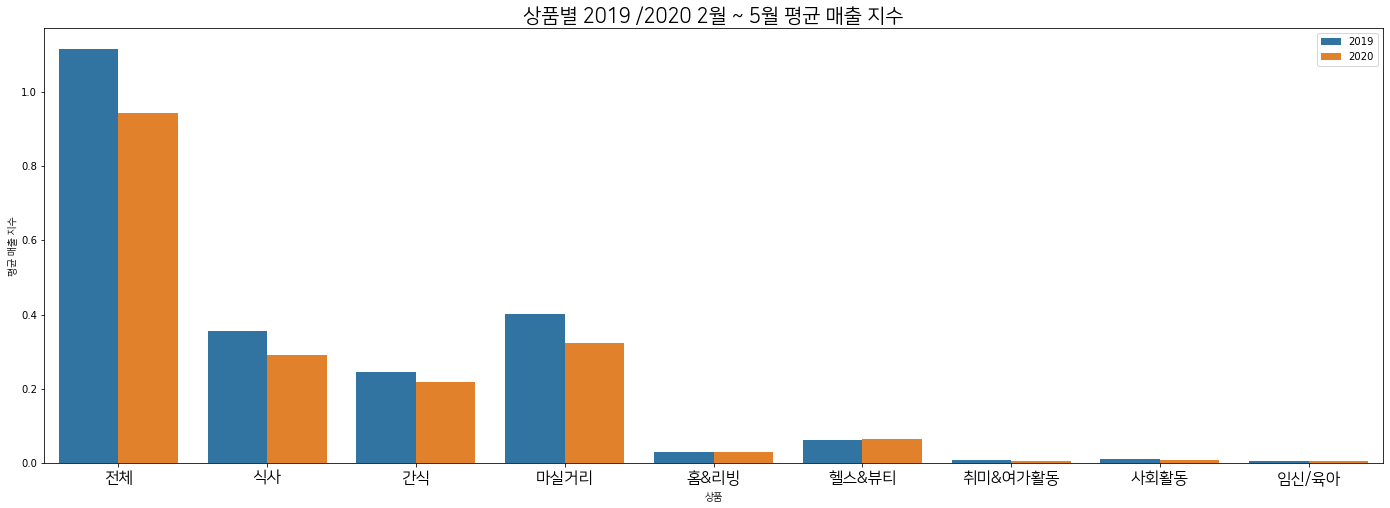

In [254]:
fig,ax=plt.subplots(figsize=(24,8))
sns.barplot(data=reshaped_sales_df,x='variable',y='value',hue='year')
ax.set_xticklabels(['전체']+list(category_dict.values()),fontproperties=font,size=16)
ax.set_title('상품별 2019 /2020 2월 ~ 5월 평균 매출 지수',fontproperties=font,size=20)
ax.set_xlabel('상품',fontproperties=font)
ax.set_ylabel('평균 매출 지수',fontproperties=font)
ax.legend()#bew
plt.show()

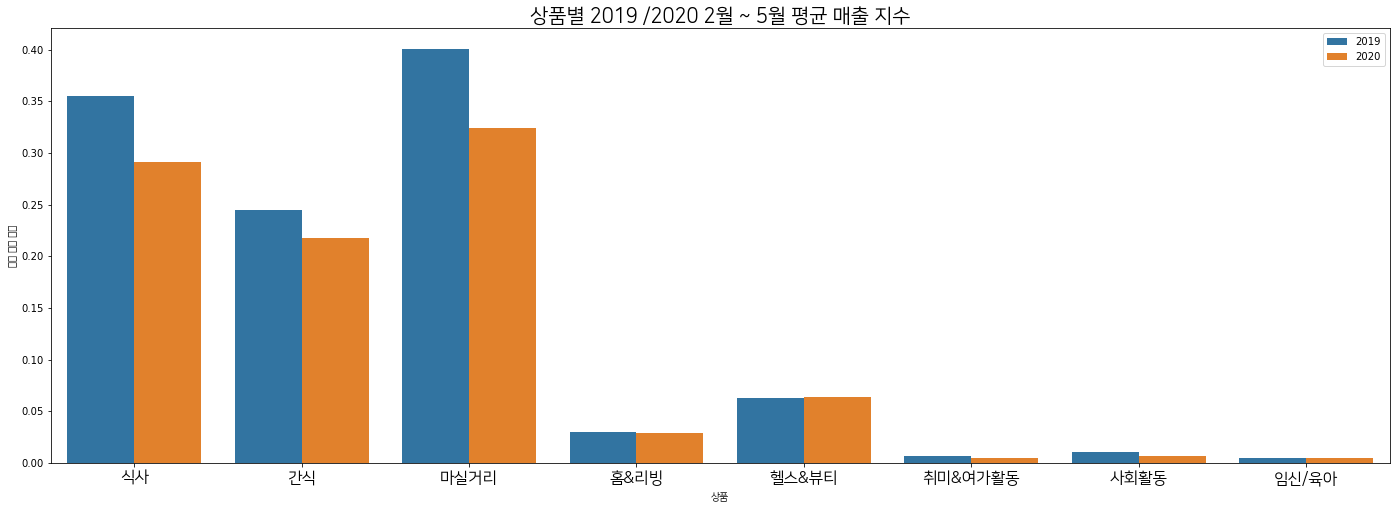

In [255]:
fig,ax=plt.subplots(figsize=(24,8))
sns.barplot(data=reshaped_sales_df[2:],x='variable',y='value',hue='year')
ax.set_xticklabels(list(category_dict.values()),fontproperties=font,size=16)
ax.set_title('상품별 2019 /2020 2월 ~ 5월 평균 매출 지수',fontproperties=font,size=20)
ax.set_xlabel('상품',fontproperties=font)
ax.set_ylabel('평균 매출 지수')
ax.legend()
plt.show() #new

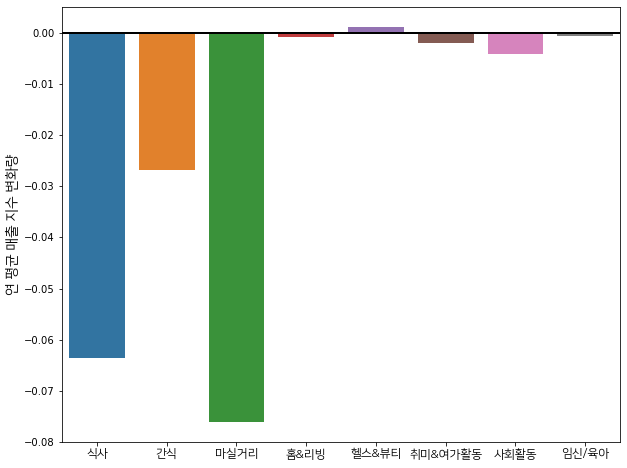

In [256]:
fig,ax=plt.subplots(figsize=(10,8))
sales_change=pd.DataFrame(reshaped_sales_df[2:].sort_values('year')['value'].diff(8).dropna().reset_index(drop=True))
sns.barplot(data=sales_change,x=sales_change.index,y='value')
ax.set_xticklabels(list(category_dict.values()),fontproperties=font,rotation=0,size=12)
ax.set_ylabel('연 평균 매출 지수 변화량',fontproperties=font,size=14)
ax.axhline(0,linewidth=2,c='k')
plt.show()

In [257]:
temp=reshaped_sales_df[2:].sort_values('year') #매출 지수 변화율을 위한 dataframe 구조변경
temp.head()

,variable,year,value
2,LCLS_10_P,2019,0.35483707
4,LCLS_20_P,2019,0.24476290
6,LCLS_30_P,2019,0.40077378
8,LCLS_40_P,2019,0.03019167
10,LCLS_50_P,2019,0.06256217


In [258]:
offline_sales.loc[:,'LCLS_10_P':'LCLS_80_P']

,LCLS_10_P,LCLS_20_P,LCLS_30_P,LCLS_40_P,LCLS_50_P,LCLS_60_P,LCLS_70_P,LCLS_80_P
0,0.47985315,0.18330086,0.31446655,0.02475950,0.04755390,0.00540108,0.00512974,0.00387079
1,0.49293122,0.21127236,0.31815020,0.00594294,0.03665820,0.00090823,0.00957209,0.00098275
2,0.30816652,0.16830577,0.32253483,0.01147801,0.02534486,0.00780512,0.00755961,0.00487667
3,0.20439002,0.12700218,0.26327353,0.01756694,0.09727073,0.00000000,0.01536439,0.00000000
4,0.46342788,0.23167047,0.35888968,0.04492088,0.04094344,0.00610655,0.00662655,0.00314264
...,...,...,...,...,...,...,...,...
14455,0.50118794,0.35264203,0.54918286,0.04179657,0.11180294,0.01012394,0.02159836,0.00670322
14456,0.38387689,0.30731038,0.50521957,0.07488666,0.10691569,0.00221173,0.00049083,0.00827238
14457,0.21666370,0.13400709,0.26454323,0.02779038,0.05671807,0.00558980,0.00592728,0.00302533
14458,0.30022879,0.29192563,0.41624918,0.03305010,0.08026692,0.00120252,0.00413565,0.00713088


In [259]:
temp_2019=temp[temp.year=='2019'].set_index('variable').drop('year',axis=1)
temp_2020=temp[temp.year=='2020'].set_index('variable').drop('year',axis=1)

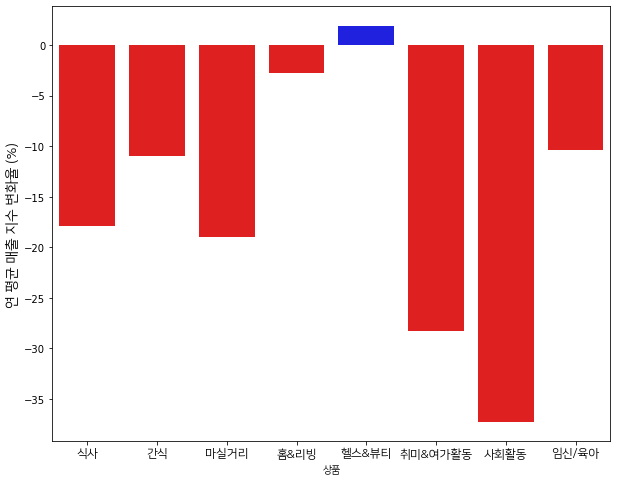

In [260]:
temp_change_percent=((temp_2020-temp_2019)/temp_2019)*100
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=temp_change_percent,x=temp_change_percent.index,y='value',ax=ax,palette=['r','r','r','r','b','r','r','r'])
ax.set_xticklabels(list(category_dict.values()),fontproperties=font,rotation=0,size=12)
ax.set_ylabel('연 평균 매출 지수 변화율 (%)',fontproperties=font,size=14)
ax.set_xlabel('상품',fontproperties=font)
plt.show()  # 홈 ㄹ

In [261]:
offline_sales

,OPER_DT,PVN,BOR,ADMD,AMT_IND,LCLS_10_P,LCLS_20_P,LCLS_30_P,LCLS_40_P,LCLS_50_P,LCLS_60_P,LCLS_70_P,LCLS_80_P,year
0,2019-02-01,대구광역시,수성구,고산1동,1.06433557,0.47985315,0.18330086,0.31446655,0.02475950,0.04755390,0.00540108,0.00512974,0.00387079,2019
1,2019-02-01,대구광역시,수성구,고산2동,1.07641799,0.49293122,0.21127236,0.31815020,0.00594294,0.03665820,0.00090823,0.00957209,0.00098275,2019
2,2019-02-01,대구광역시,수성구,고산3동,0.85607140,0.30816652,0.16830577,0.32253483,0.01147801,0.02534486,0.00780512,0.00755961,0.00487667,2019
3,2019-02-01,대구광역시,수성구,두산동,0.72486779,0.20439002,0.12700218,0.26327353,0.01756694,0.09727073,0.00000000,0.01536439,0.00000000,2019
4,2019-02-01,대구광역시,수성구,만촌1동,1.15572808,0.46342788,0.23167047,0.35888968,0.04492088,0.04094344,0.00610655,0.00662655,0.00314264,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14455,2020-05-31,서울특별시,중구,중림동,1.59503787,0.50118794,0.35264203,0.54918286,0.04179657,0.11180294,0.01012394,0.02159836,0.00670322,2020
14456,2020-05-31,서울특별시,중구,청구동,1.38918413,0.38387689,0.30731038,0.50521957,0.07488666,0.10691569,0.00221173,0.00049083,0.00827238,2020
14457,2020-05-31,서울특별시,중구,필동,0.71426489,0.21666370,0.13400709,0.26454323,0.02779038,0.05671807,0.00558980,0.00592728,0.00302533,2020
14458,2020-05-31,서울특별시,중구,황학동,1.13418966,0.30022879,0.29192563,0.41624918,0.03305010,0.08026692,0.00120252,0.00413565,0.00713088,2020


In [262]:
day_offline=offline_sales.groupby('OPER_DT').mean() # 일 평균 산업별 매출 지수를 표현하는 dataframe 생성

In [263]:
day_offline.index = pd.to_datetime(day_offline.index,format='%Y%m%d')
day_offline.head()

,AMT_IND,LCLS_10_P,LCLS_20_P,LCLS_30_P,LCLS_40_P,LCLS_50_P,LCLS_60_P,LCLS_70_P,LCLS_80_P
OPER_DT,,,,,,,,,
2019-02-01,1.13094030,0.39135777,0.23068841,0.35810833,0.04041568,0.08376259,0.01249643,0.01038700,0.00372409
2019-02-02,1.03919596,0.33334560,0.23649460,0.35846665,0.02730226,0.06071114,0.00775979,0.01083540,0.00428051
2019-02-03,0.96989664,0.30689526,0.21596338,0.30140418,0.02186070,0.10429736,0.00628242,0.00959503,0.00359831
2019-02-04,0.95381152,0.29413040,0.22733154,0.31664876,0.02350532,0.06422237,0.00930161,0.01378358,0.00488795
2019-02-05,1.06795862,0.28699447,0.27723889,0.37439009,0.02376167,0.07332635,0.01025910,0.01327706,0.00871099


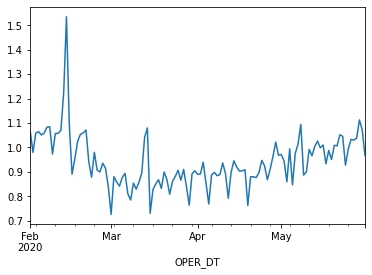

In [264]:
day_offline['AMT_IND']['2020'].plot() # 이상치 발견 2월 중순 / 3월 중순
plt.show()

In [46]:
day_offline['2020'].AMT_IND.sort_values(ascending=False)

OPER_DT
2020-02-14    1.534621
2020-02-13    1.223629
2020-05-29    1.112614
2020-02-15    1.097809
2020-05-08    1.094388
                ...   
2020-04-05    0.769069
2020-03-29    0.763976
2020-04-19    0.762801
2020-03-15    0.730536
2020-03-01    0.726407
Name: AMT_IND, Length: 121, dtype: float64

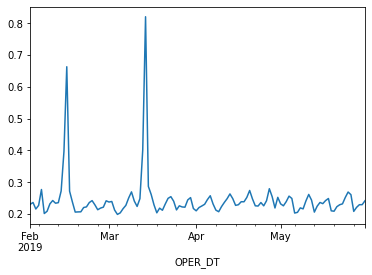

In [265]:
day_offline.loc['2019-02':'2019-05']['LCLS_20_P'].plot() # 간식에서 2,3월  13일 14일 폭등  /  4월 부터 X

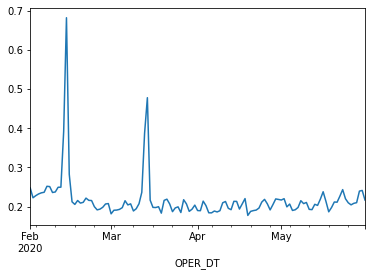

In [266]:
day_offline.loc['2020-02':'2020-08']['LCLS_20_P'].plot() # 간식에서 2,3월  13일 14일 폭등  /  4월 부터 X

In [268]:
corona

,confirmed
date,
2020-01-20,1
2020-01-21,0
2020-01-22,0
2020-01-23,0
2020-01-24,1
...,...
2020-06-26,39
2020-06-27,51
2020-06-28,62


In [269]:
offline_sales

,OPER_DT,PVN,BOR,ADMD,AMT_IND,LCLS_10_P,LCLS_20_P,LCLS_30_P,LCLS_40_P,LCLS_50_P,LCLS_60_P,LCLS_70_P,LCLS_80_P,year
0,2019-02-01,대구광역시,수성구,고산1동,1.06433557,0.47985315,0.18330086,0.31446655,0.02475950,0.04755390,0.00540108,0.00512974,0.00387079,2019
1,2019-02-01,대구광역시,수성구,고산2동,1.07641799,0.49293122,0.21127236,0.31815020,0.00594294,0.03665820,0.00090823,0.00957209,0.00098275,2019
2,2019-02-01,대구광역시,수성구,고산3동,0.85607140,0.30816652,0.16830577,0.32253483,0.01147801,0.02534486,0.00780512,0.00755961,0.00487667,2019
3,2019-02-01,대구광역시,수성구,두산동,0.72486779,0.20439002,0.12700218,0.26327353,0.01756694,0.09727073,0.00000000,0.01536439,0.00000000,2019
4,2019-02-01,대구광역시,수성구,만촌1동,1.15572808,0.46342788,0.23167047,0.35888968,0.04492088,0.04094344,0.00610655,0.00662655,0.00314264,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14455,2020-05-31,서울특별시,중구,중림동,1.59503787,0.50118794,0.35264203,0.54918286,0.04179657,0.11180294,0.01012394,0.02159836,0.00670322,2020
14456,2020-05-31,서울특별시,중구,청구동,1.38918413,0.38387689,0.30731038,0.50521957,0.07488666,0.10691569,0.00221173,0.00049083,0.00827238,2020
14457,2020-05-31,서울특별시,중구,필동,0.71426489,0.21666370,0.13400709,0.26454323,0.02779038,0.05671807,0.00558980,0.00592728,0.00302533,2020
14458,2020-05-31,서울특별시,중구,황학동,1.13418966,0.30022879,0.29192563,0.41624918,0.03305010,0.08026692,0.00120252,0.00413565,0.00713088,2020


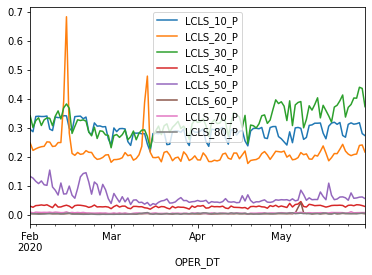

In [924]:
day_offline['2020'].iloc[:,1:].plot()

# SARIMAX MODEL

## 식사

In [270]:
category_dict

{10: '식사',
 20: '간식',
 30: '마실거리',
 40: '홈&리빙',
 50: '헬스&뷰티',
 60: '취미&여가활동',
 70: '사회활동',
 80: '임신/육아'}

In [278]:
corona=corona['2020-02':'2020-05']
corona.head()

,confirmed
date,
2020-02-01,1
2020-02-02,3
2020-02-03,0
2020-02-04,1
2020-02-05,2


In [280]:
adfuller(day_offline['LCLS_10_P']['2020'])

(-2.059832253283231,
 0.260969822995183,
 13,
 107,
 {'1%': -3.492995948509562,
  '5%': -2.888954648057252,
  '10%': -2.58139291903223},
 -649.0572791352174)

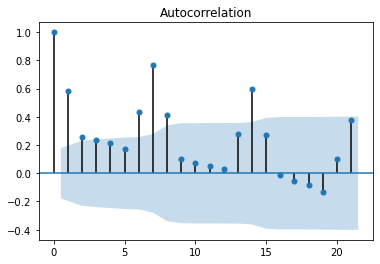

In [281]:
# {10: '식사', 20: '간식', 30: '마실거리', 40: '홈&리빙', 50: '헬스&뷰티', 60: '취미&여가활동', 70: '사회활동', 80: '임신/육아'}
g=plot_acf(day_offline['LCLS_10_P']['2020'].dropna())
# 자기상관 그래프를 통해 AR model parameter 파악

In [282]:
print(adfuller(day_offline['LCLS_10_P']['2020'])) # adfuller report

(-2.059832253283231, 0.260969822995183, 13, 107, {'1%': -3.492995948509562, '5%': -2.888954648057252, '10%': -2.58139291903223}, -649.0572791352174)


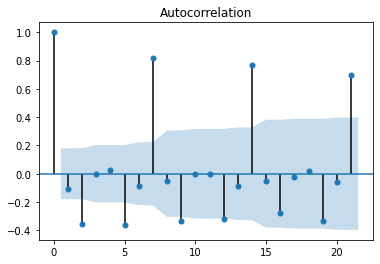

In [283]:
g=plot_acf(day_offline['LCLS_10_P']['2020'].diff().dropna())

In [284]:
print(adfuller(day_offline['LCLS_10_P']['2020'].diff().dropna()))

(-3.2595839371685686, 0.016784607353223163, 13, 106, {'1%': -3.4936021509366793, '5%': -2.8892174239808703, '10%': -2.58153320754717}, -645.8021992830584)


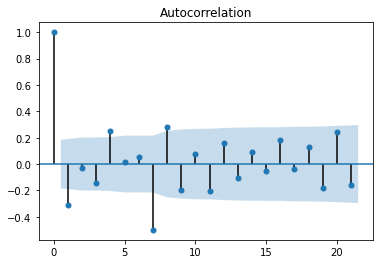

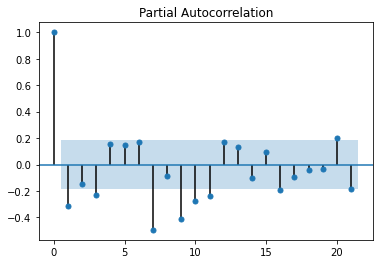

In [285]:
g=plot_acf(day_offline['LCLS_10_P']['2020'].diff().dropna().diff(7).dropna())
g2=plot_pacf(day_offline['LCLS_10_P']['2020'].diff().dropna().diff(7).dropna())

In [286]:
adfuller(day_offline['LCLS_10_P']['2020'].rolling(7).mean().dropna())

(-3.729956116137308,
 0.0037109903222976104,
 12,
 102,
 {'1%': -3.4961490537199116,
  '5%': -2.8903209639580556,
  '10%': -2.5821223452518263},
 -1030.891473189195)

In [287]:
print(adfuller(day_offline['LCLS_10_P']['2020'].diff().diff(7).dropna())) # Best d=1, S=7

(-4.491405645520322, 0.0002037920644822482, 11, 101, {'1%': -3.4968181663902103, '5%': -2.8906107514600103, '10%': -2.5822770483285953}, -612.9940175394511)


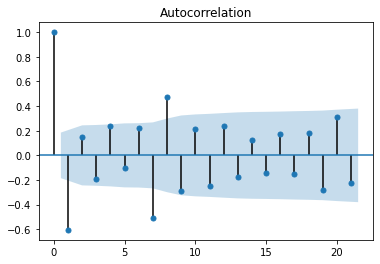

In [289]:
g=plot_acf(day_offline['LCLS_10_P']['2020'].diff().diff().diff(7).dropna()) # adfuller와 자기상관 그래프를 통한 검증 (d=1 , D=7) Best d=1, S=7

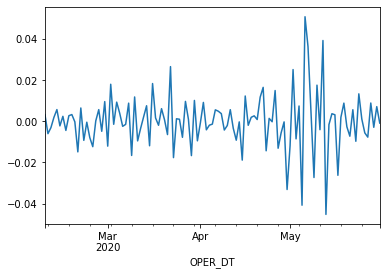

In [290]:
y=day_offline['LCLS_10_P']['2020'].diff().diff(7).dropna()
y.plot()
plt.show() # 정상시계열 / 계절성 주기 7 , 비계절성 주기 1

# SARIMAX

In [294]:
df=day_offline['2020']['LCLS_10_P']

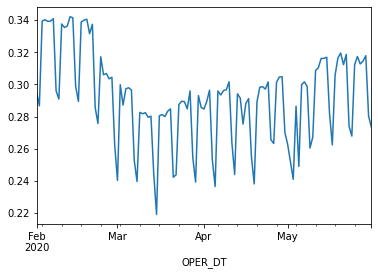

In [295]:
df.plot()
plt.show()

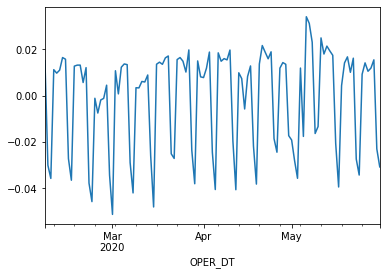

In [296]:
df_rolling=(df-df.rolling(7).mean()).dropna()
df_rolling.plot()
plt.show()

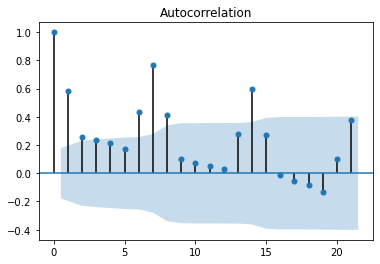

In [297]:
plot=plot_acf(df) # S 파악 어렵다 (rolling mean 적용)

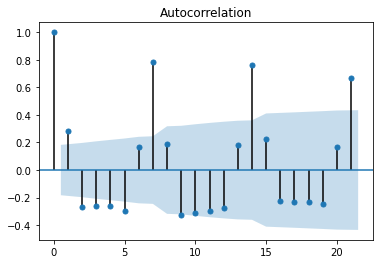

In [298]:
plot=plot_acf(df_rolling) # S = 7

0.016784607353223163


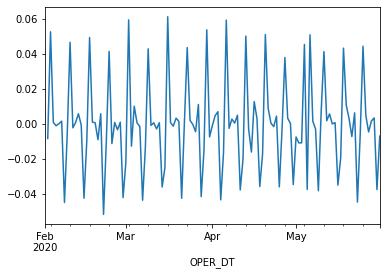

In [299]:
print(adfuller(df.diff().dropna())[1])
df.diff().plot() # 1차 차분을 통해 Trend 제거하였지만 Seasonal cycle 존재
plt.show()


(-4.491405645520322, 0.0002037920644822482, 11, 101, {'1%': -3.4968181663902103, '5%': -2.8906107514600103, '10%': -2.5822770483285953}, -612.9940175394511)


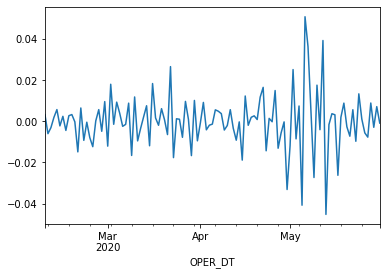

In [300]:
df.diff().diff(7).dropna().plot()
print(adfuller(df.diff().diff(7).dropna())) # 정상 시계열 p-value < 0.05

(-4.491405645520322, 0.0002037920644822482, 11, 101, {'1%': -3.4968181663902103, '5%': -2.8906107514600103, '10%': -2.5822770483285953}, -612.9940175394511)


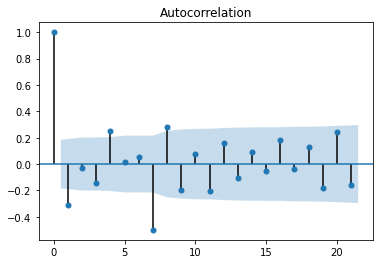

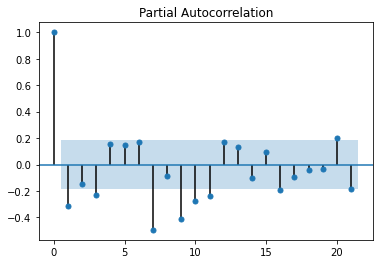

In [301]:
df_sta=df.diff().diff(7).dropna()
a=plot_acf(df_sta)
p=plot_pacf(df_sta)
print(adfuller(df_sta)) # acf pacf 통해 1차적으로 AR, MA 차수 파악

In [302]:
day_offline

,AMT_IND,LCLS_10_P,LCLS_20_P,LCLS_30_P,LCLS_40_P,LCLS_50_P,LCLS_60_P,LCLS_70_P,LCLS_80_P
OPER_DT,,,,,,,,,
2019-02-01,1.13094030,0.39135777,0.23068841,0.35810833,0.04041568,0.08376259,0.01249643,0.01038700,0.00372409
2019-02-02,1.03919596,0.33334560,0.23649460,0.35846665,0.02730226,0.06071114,0.00775979,0.01083540,0.00428051
2019-02-03,0.96989664,0.30689526,0.21596338,0.30140418,0.02186070,0.10429736,0.00628242,0.00959503,0.00359831
2019-02-04,0.95381152,0.29413040,0.22733154,0.31664876,0.02350532,0.06422237,0.00930161,0.01378358,0.00488795
2019-02-05,1.06795862,0.28699447,0.27723889,0.37439009,0.02376167,0.07332635,0.01025910,0.01327706,0.00871099
...,...,...,...,...,...,...,...,...,...
2020-05-27,1.03059313,0.31271248,0.20830732,0.40290688,0.03193717,0.05754418,0.00490057,0.00728559,0.00499895
2020-05-28,1.03830581,0.31438745,0.20998556,0.40234740,0.03536580,0.05868318,0.00478805,0.00791249,0.00483589
2020-05-29,1.11261437,0.31783281,0.23949616,0.43995684,0.03465958,0.06140612,0.00615073,0.00811658,0.00499556


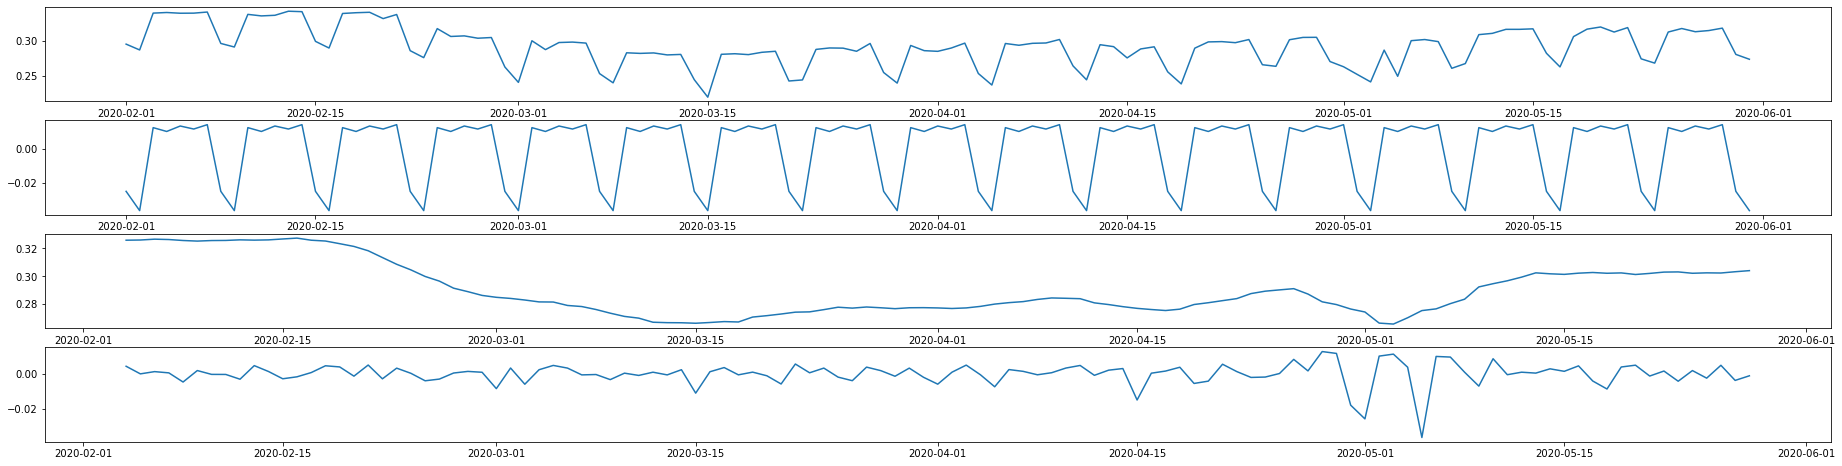

In [303]:
report=sm.tsa.seasonal_decompose(df)
fig,ax=plt.subplots(4,1,figsize=(32,8))
ax[0].plot(df)
ax[1].plot(report.seasonal)
ax[2].plot(report.trend)
ax[3].plot(report.resid) # 시계열 분해를 통해 Trend와 계절성파악
plt.show()


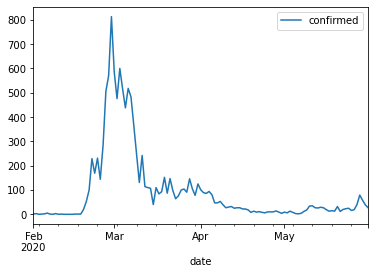

In [304]:
corona.plot()
plt.show()

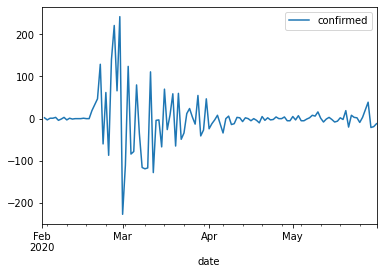

In [305]:
corona.diff().plot()
plt.show()

(-4.046839267452197, 0.0011841605248520044, 11, 108, {'1%': -3.4924012594942333, '5%': -2.8886968193364835, '10%': -2.5812552709190673}, 1161.5678918789504)


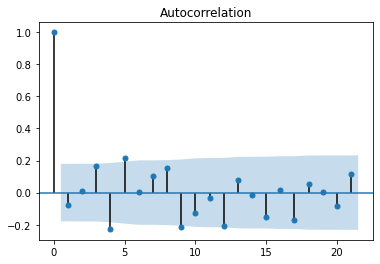

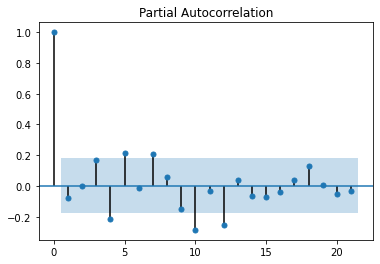

In [306]:
g=plot_acf(corona.diff().dropna())
g2=plot_pacf(corona.diff().dropna())
print(adfuller(corona.diff().dropna())) # 코로나 데이터에도 차분을 하였으나 실제 AIC value에 큰 영향이 없었다.

In [307]:
decomposition = auto_arima(day_offline['LCLS_70_P']['2020'],start_p=0,start_q=0,max_p=3,max_q=3,m=0,start_P=0,start_Q=0,seasonal=False,
                           max_d=3,D=1,trace=True,error_action='ignore',supress_warnings=True,stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1235.725, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1280.416, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1299.922, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1237.705, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1310.069, Time=0.20 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1308.668, Time=0.16 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1229.721, Time=0.41 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1305.871, Time=0.16 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-1297.597, Time=0.23 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1227.722, Time=0.64 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-1310.731, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-1301.885, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-1282.408, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-1310.611, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0

In [308]:
model=sm.tsa.statespace.SARIMAX(df,order=(2,1,0),seasonal_order=(0,1,1,7),enforce_stationarity=False,enforce_invertibility=False)
decom = model.fit()

                                      SARIMAX Results                                      
Dep. Variable:                           LCLS_10_P   No. Observations:                  121
Model:             SARIMAX(2, 1, 0)x(0, 1, [1], 7)   Log Likelihood                 340.397
Date:                             Sat, 26 Sep 2020   AIC                           -672.793
Time:                                     23:14:28   BIC                           -662.177
Sample:                                 02-01-2020   HQIC                          -668.491
                                      - 05-31-2020                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3816      0.051     -7.540      0.000      -0.481      -0.282
ar.L2         -0.2824      

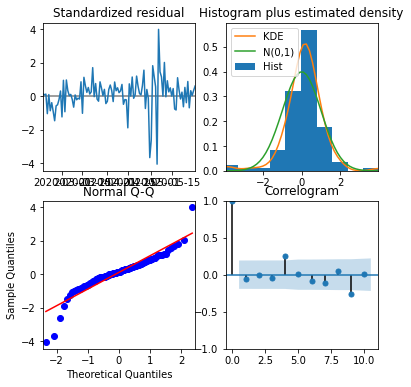

In [309]:
print(decom.summary())
p=decom.plot_diagnostics(figsize=(6,6))

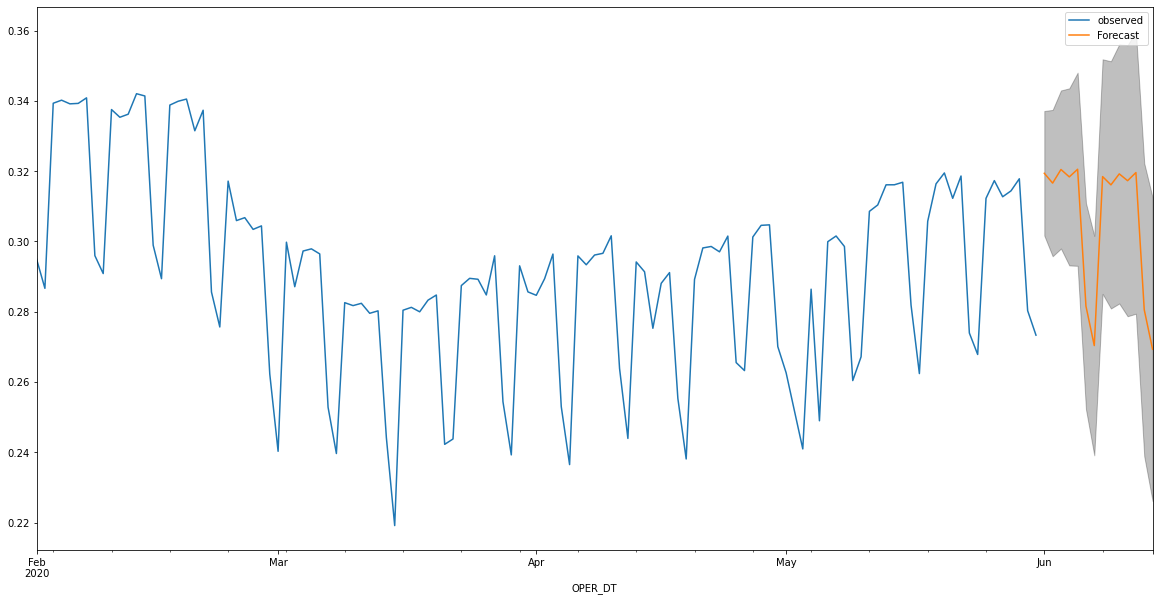

In [310]:
pred=decom.get_forecast(steps=14)
pred_ci=pred.conf_int()

p = df.plot(label='observed',figsize=(20,10))
pred.predicted_mean.plot(ax=p,label='Forecast')
p.fill_between(pred_ci.index,pred_ci.iloc[:,0],pred_ci.iloc[:,1],color='k',alpha=.25)
plt.legend()
plt.show()

In [311]:
model=sm.tsa.statespace.SARIMAX(df[1:],order=(2,1,0),seasonal_order=(0,1,1,7),enforce_stationarity=True,enforce_invertibility=True,exog=corona.rolling(2).mean().dropna())
decom = model.fit()

In [312]:
decom

                                      SARIMAX Results                                      
Dep. Variable:                           LCLS_10_P   No. Observations:                  120
Model:             SARIMAX(2, 1, 0)x(0, 1, [1], 7)   Log Likelihood                 358.719
Date:                             Sat, 26 Sep 2020   AIC                           -707.439
Time:                                     23:14:59   BIC                           -693.846
Sample:                                 02-02-2020   HQIC                          -701.924
                                      - 05-31-2020                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
confirmed  -1.362e-05   3.44e-05     -0.396      0.692    -8.1e-05    5.37e-05
ar.L1         -0.3526      

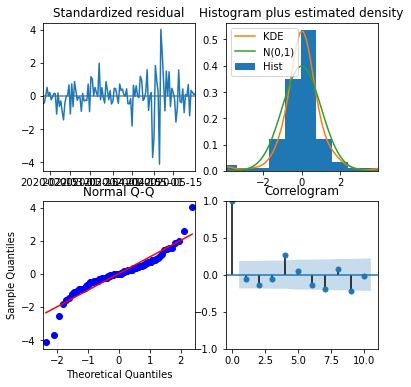

In [313]:
print(decom.summary())
p=decom.plot_diagnostics(figsize=(6,6))

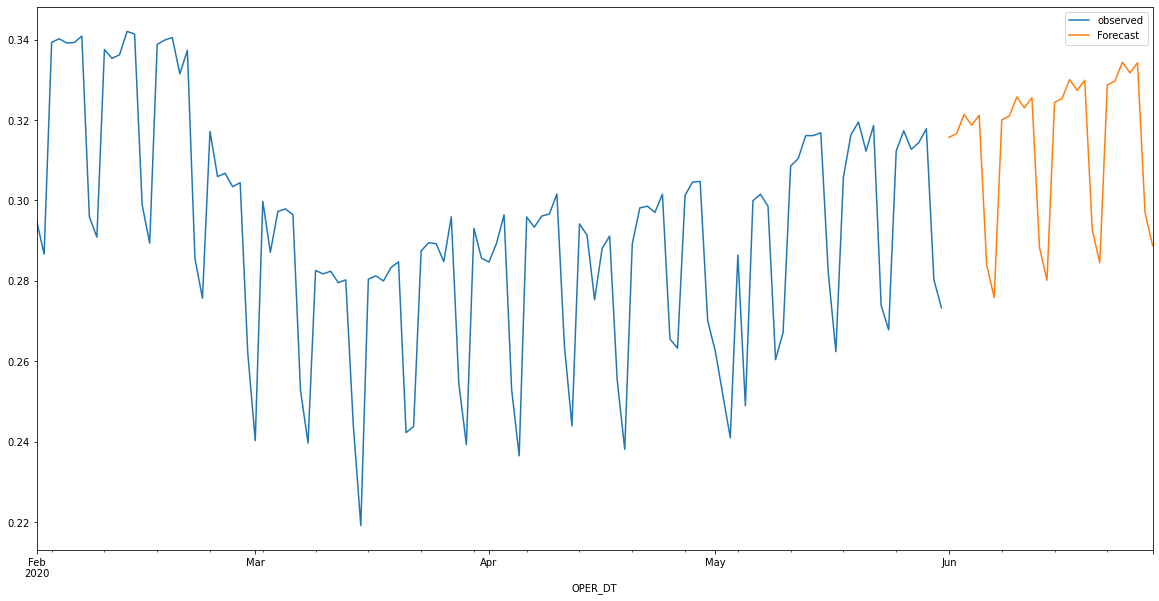

In [314]:
pred=decom.get_forecast(steps=28,exog=[150]*28)
pred_ci=pred.conf_int()

p = df.plot(label='observed',figsize=(20,10))
pred.predicted_mean.plot(ax=p,label='Forecast')
# p.fill_between(pred_ci.index,pred_ci.iloc[:,0],pred_ci.iloc[:,1],color='k',alpha=.25)
plt.legend()
plt.show()

# SARIMAX 생성 및 결과분석 함수 정의

식사 Sarimax 예측모델 생성
Auto ARIMA AIC: -721.5603
SARIMAX AIC: -643.2071
일일 확진자 수 데이터 계수: -1.8068946401247928e-05
예측된 평균 매출지표 추세선의 기울기: 0.0006438752220304031


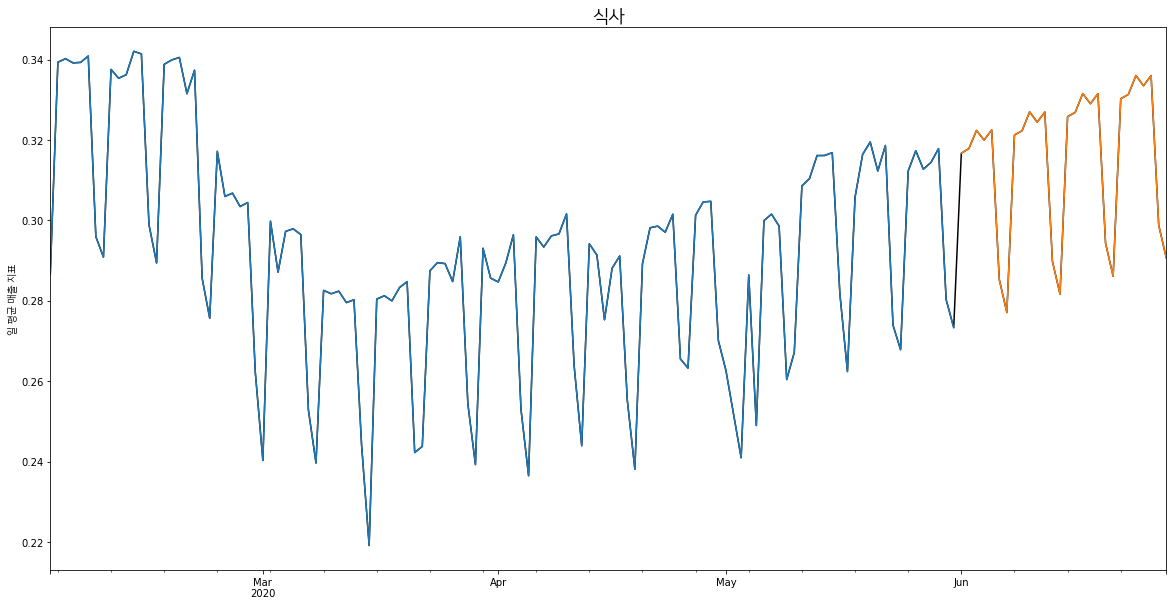

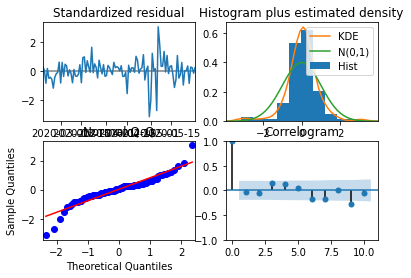

간식 Sarimax 예측모델 생성
Auto ARIMA AIC: -334.2258
SARIMAX AIC: -316.9863
일일 확진자 수 데이터 계수: -0.0001113567352466028
예측된 평균 매출지표 추세선의 기울기: 0.0005478025329945622


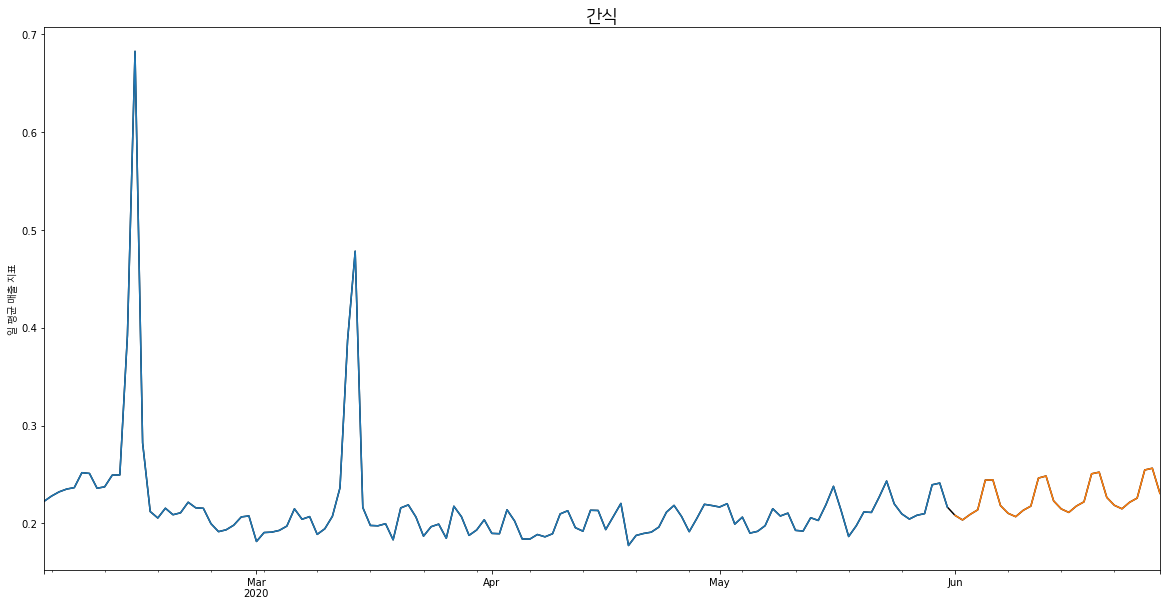

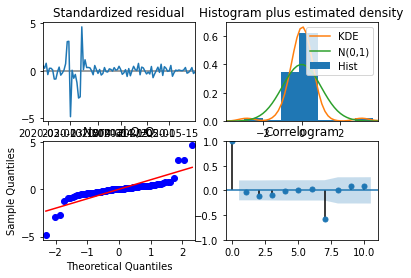

마실거리 Sarimax 예측모델 생성
Auto ARIMA AIC: -503.5127
SARIMAX AIC: -461.3478
일일 확진자 수 데이터 계수: -3.5992218842282326e-05
예측된 평균 매출지표 추세선의 기울기: 0.002163090660799717


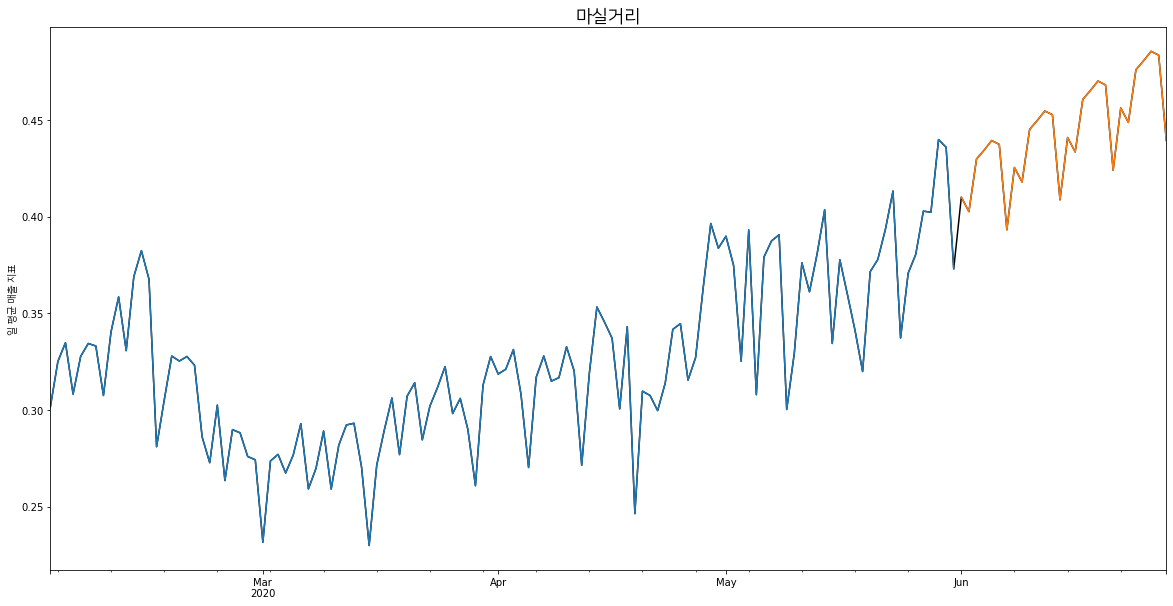

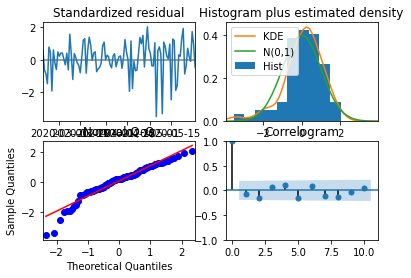

홈&리빙 Sarimax 예측모델 생성
Auto ARIMA AIC: -979.5004
SARIMAX AIC: -880.3273
일일 확진자 수 데이터 계수: -4.829635116356812e-07
예측된 평균 매출지표 추세선의 기울기: 0.00010489974618005848


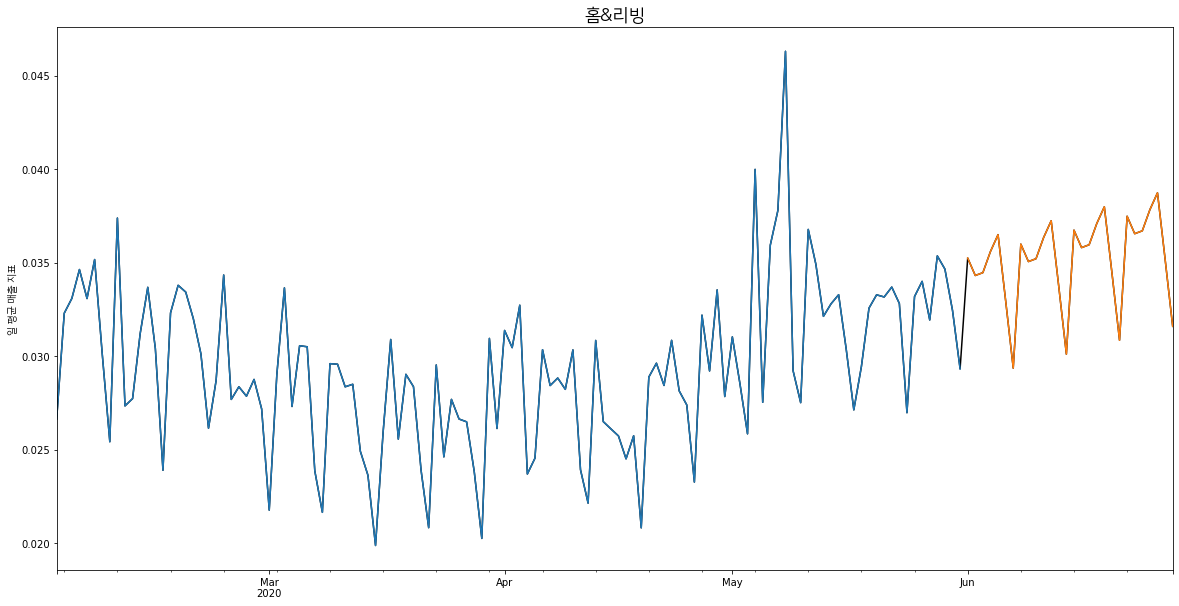

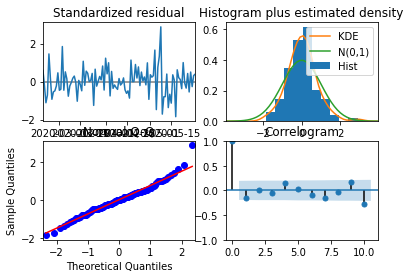

헬스&뷰티 Sarimax 예측모델 생성
Auto ARIMA AIC: -589.01
SARIMAX AIC: -531.9713
일일 확진자 수 데이터 계수: -6.62355126472895e-05
예측된 평균 매출지표 추세선의 기울기: 0.00021667574391415472


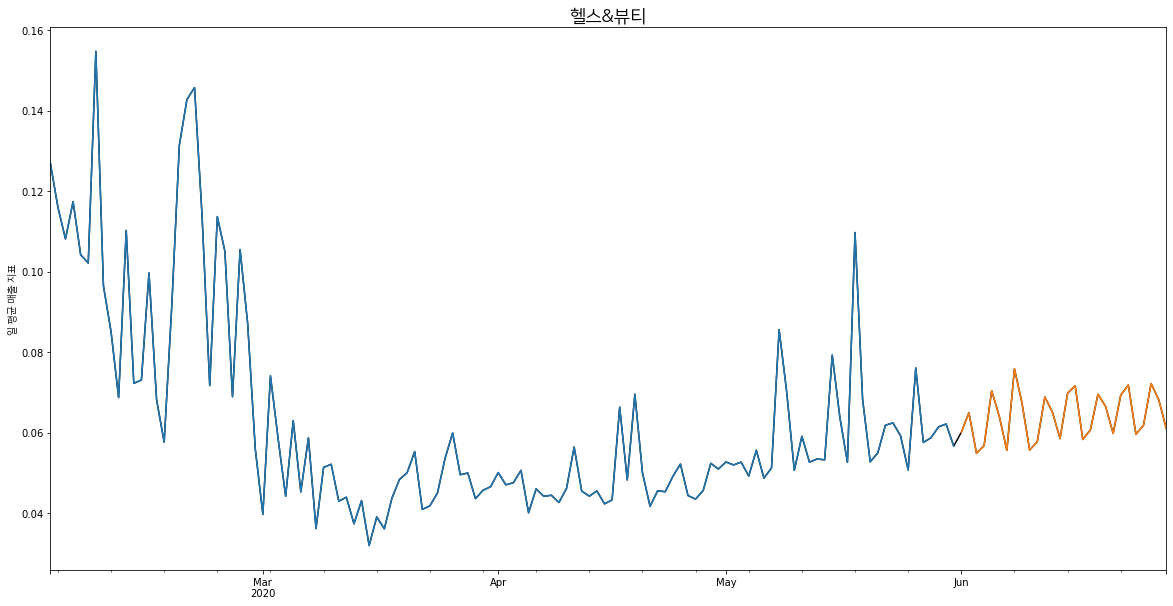

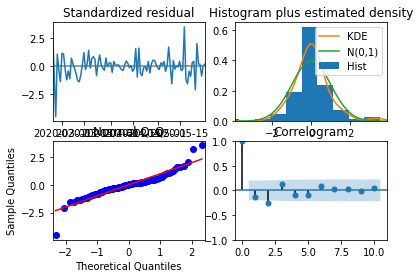

취미&여가활동 Sarimax 예측모델 생성
Auto ARIMA AIC: -913.6199
SARIMAX AIC: -797.5572
일일 확진자 수 데이터 계수: -2.7130990043538155e-06
예측된 평균 매출지표 추세선의 기울기: -4.638252927331712e-05


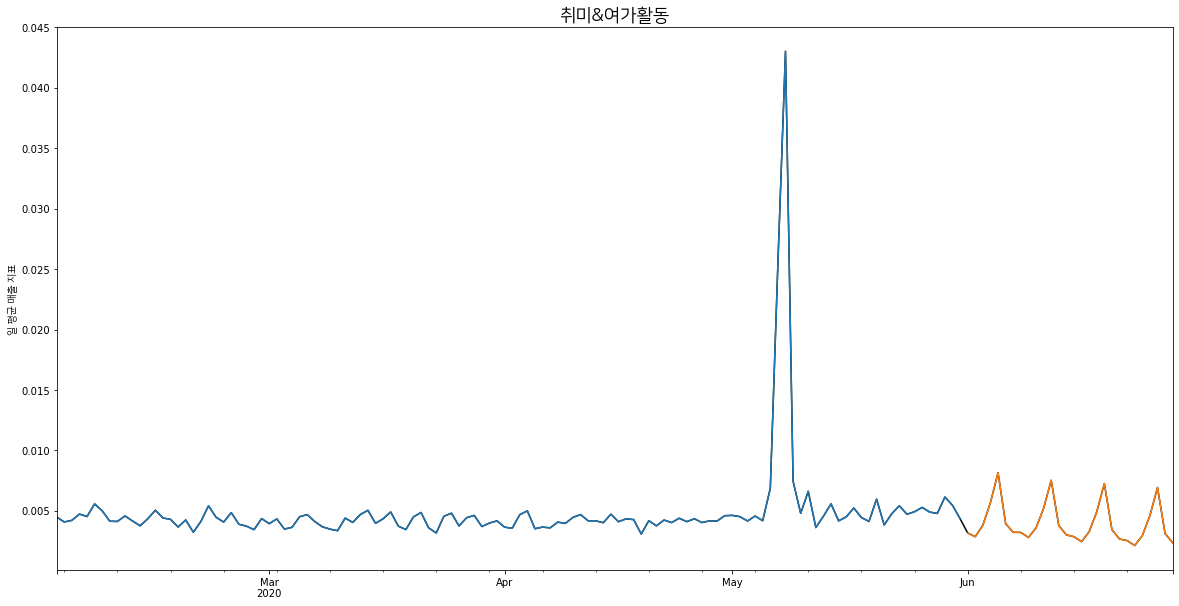

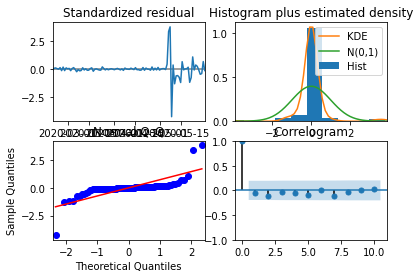

사회활동 Sarimax 예측모델 생성
Auto ARIMA AIC: -1237.3675
SARIMAX AIC: -1064.3729
일일 확진자 수 데이터 계수: -2.16206422782891e-06
예측된 평균 매출지표 추세선의 기울기: 6.795663702247595e-05


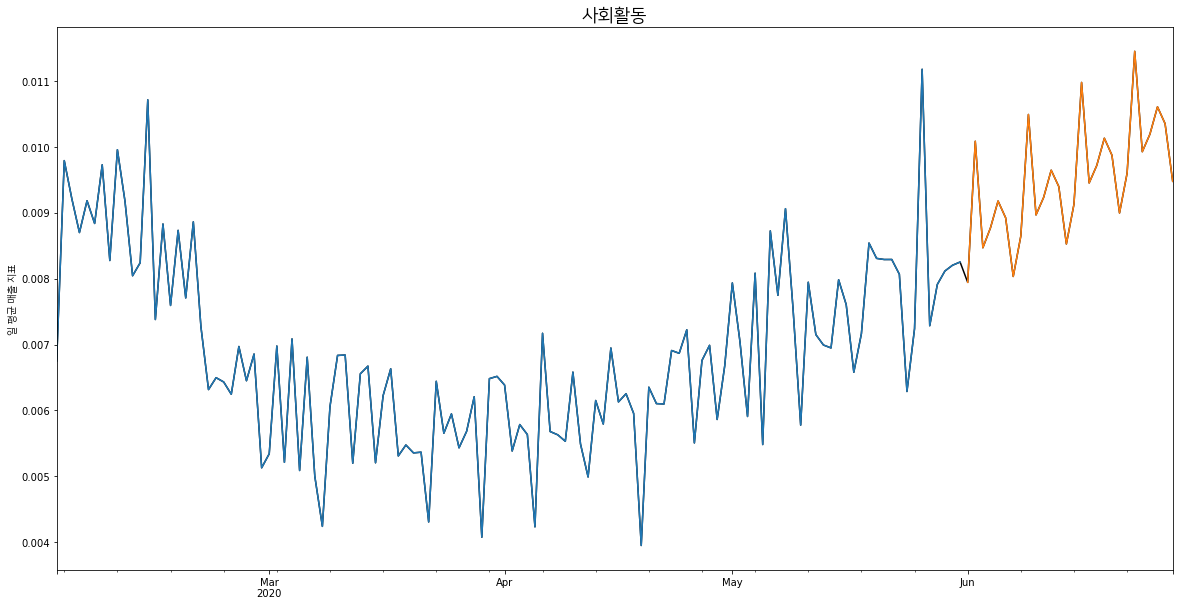

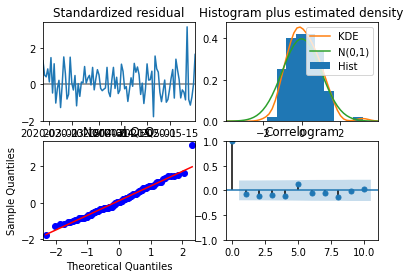

임신/육아 Sarimax 예측모델 생성
Auto ARIMA AIC: -1189.9233
SARIMAX AIC: -1073.3571
일일 확진자 수 데이터 계수: -3.065978494515156e-06
예측된 평균 매출지표 추세선의 기울기: 1.7353004144641188e-05


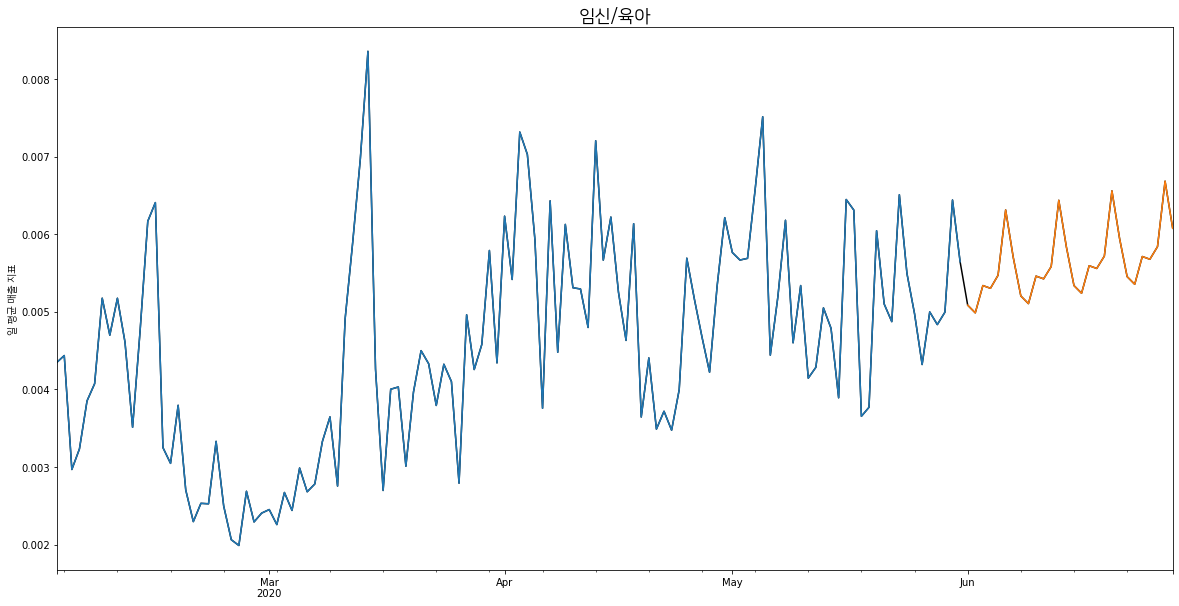

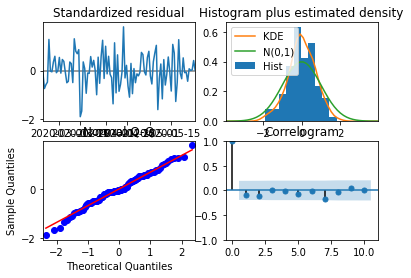

In [326]:
day_offline_col = day_offline.columns[1:].tolist()
corona_coef_list=[]
lr_coef_list=[]
after_corona = sorted(random.sample([x for x in range(0,51)],28),reverse=True)
def sarimax_model(df,col=''):
    print(col+' Sarimax 예측모델 생성')
    decomposition = auto_arima(df[1:],start_p=0,start_q=0,max_p=3,max_q=3,m=7,start_P=0,start_Q=0,seasonal=True,
                           max_d=3,D=1,d=1,max_D=3,trace=False,error_action='ignore',supress_warnings=True,stepwise=True)
    print('Auto ARIMA AIC:',round(decomposition.aic(),4))
    model=sm.tsa.statespace.SARIMAX(df[1:],order=decomposition.order,seasonal_order=decomposition.seasonal_order,
                                    enforce_stationarity=False,enforce_invertibility=False,exog=corona.rolling(2).mean().dropna())
    decom = model.fit()
    print('SARIMAX AIC:',round(decom.aic,4))
    fig,ax=plt.subplots(figsize=(20,10))
    decom.plot_diagnostics()
    pred=decom.get_forecast(steps=28,exog=after_corona)
    pred_ci=pred.conf_int()
    pd.concat([df[1:],pred.predicted_mean]).plot(ax=ax,c='k')
    df[1:].plot(label='observed',ax=ax)
    pred.predicted_mean.plot(ax=ax,label='Forecast')
    ax.set_title(col,fontproperties=font,size=18)
    o=sm.tsa.seasonal_decompose(pd.concat([df[1:],pred.predicted_mean])).trend['2020-06']
    o=o.reset_index(drop=True).dropna()
    lr = LinearRegression()
    lr.fit(np.array(o.index).reshape(-1,1),o.values)
    print('일일 확진자 수 데이터 계수:',decom.params['confirmed'])
    print('예측된 평균 매출지표 추세선의 기울기:',lr.coef_[0])
    corona_coef_list.append(decom.params['confirmed'])
    lr_coef_list.append(lr.coef_)
    ax.set_xlabel('')
    ax.set_ylabel('일 평균 매출 지표',fontproperties=font)
    plt.show()
def make_model(df_all_col):
    for col in day_offline_col:
        sarimax_model(df_all_col[col],category_dict[int(col[5:7])])
make_model(day_offline['2020'])
    